In [4]:
# -Example
import numpy as np

import matplotlib.pyplot as plt

#By Lukas
from DataModelDict import DataModelDict as dmd

text_file = open('kolskybar.xml', "r")
qdata = dmd(text_file)
print qdata.xml(indent=2)

table = qdata.find('stressStrain')
distable = []
for row in table['rows'].iterlist('row'):
        disrow = []
        for column in row.iterlist('column'):
                disrow.append(column['#text'])
        distable.append(disrow)

del distable[0]
distable = np.array(distable)

print distable

[[  4.86122563e-06   9.89667340e+00  -5.96976005e+02]
 [  2.61318576e-04  -1.33870592e+01   5.12914701e+02]
 [  4.62210314e-04  -2.24729061e-01   4.01783476e+02]
 [  6.05559733e-04   2.47553752e+00   2.86698838e+02]
 [  7.17312026e-04  -5.29005181e+00   2.23504587e+02]
 [  7.87446046e-04   1.29441974e+01   1.40268039e+02]
 [  8.28805605e-04  -2.58873103e+00   8.27191187e+01]
 [  8.46271018e-04   5.51507932e+00   3.49308260e+01]
 [  8.40267039e-04  -4.27772643e+00  -1.20079591e+01]
 [  8.22045951e-04  -4.61462834e+00  -3.64421751e+01]
 [  7.79360128e-04   1.12507929e+00  -8.53716455e+01]
 [  7.39405754e-04  -8.32868890e+00  -7.99087479e+01]
 [  6.89379360e-04   1.66562762e+01  -1.00052789e+02]
 [  6.34005778e-04  -9.67830153e+00  -1.10747165e+02]
 [  5.85088514e-04   6.18945646e+00  -9.78345282e+01]
 [  5.32561188e-04   4.83857619e+00  -1.05054651e+02]
 [  4.87745349e-04  -1.33900907e+01  -8.96316784e+01]
 [  4.42023119e-04   8.55157644e+00  -9.14444595e+01]
 [  4.07560903e-04  -5.96310

In [7]:

p_alpha = 1
volume=50
fig, ax = plt.subplots(figsize=(12, 9))

ax.plot(distable[:,0],distable[:,1],lw=3) # plots first col vs second because stress vs strain
ax.tick_params(axis='x', labelsize=25, pad = 10)
ax.tick_params(axis='y', labelsize=25, pad = 10)


ax.grid(True)
fig.tight_layout()


plt.show()



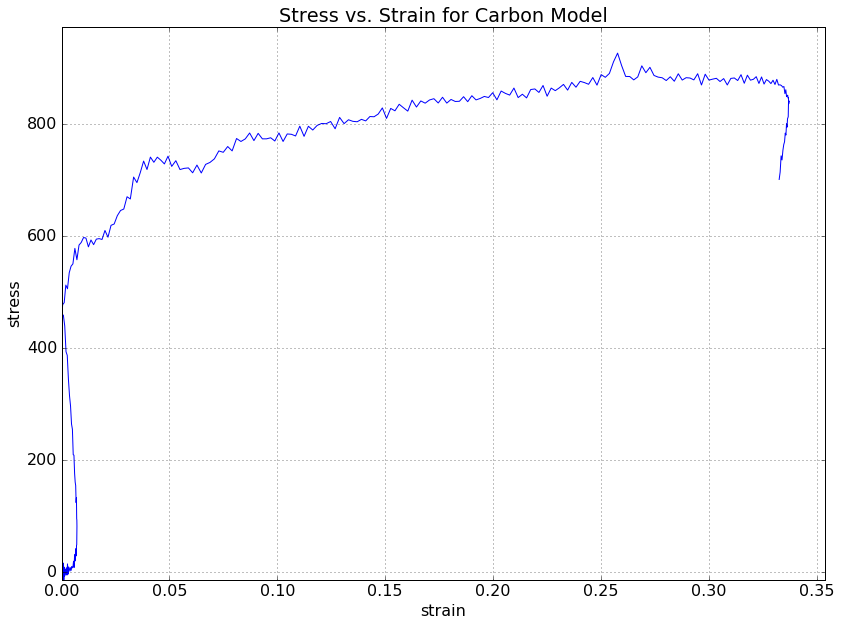

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import graph_suite as plot
import test_suite
reload(test_suite)

from DataModelDict import DataModelDict as dmd

table = dmd(open('kolskybar.xml', "r")).find('stressStrain')

distable = []

for row in table['rows'].iteraslist('row'):
    
        disrow = []
        
        for column in row.iteraslist('column'):
                disrow.append(column['#text'])
        
        distable.append(disrow)

del distable[0] # gets rid of header
distable = np.array(distable)

plot.plot2D(distable,'strain','stress','Stress vs. Strain for Carbon Model')

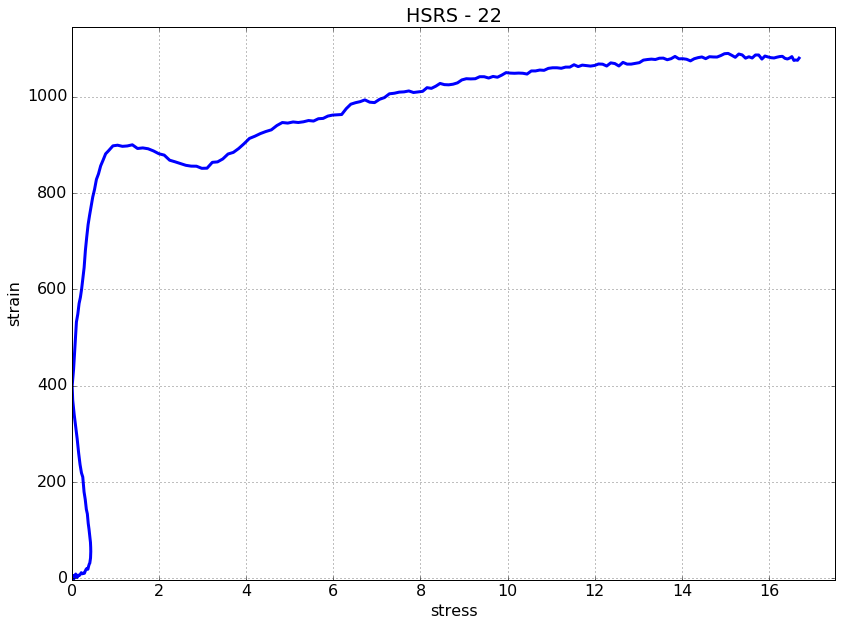

In [13]:
data = np.loadtxt('ref/HSRS/22')

test_suite.plot2D(data,'stress','strain','HSRS - 22')

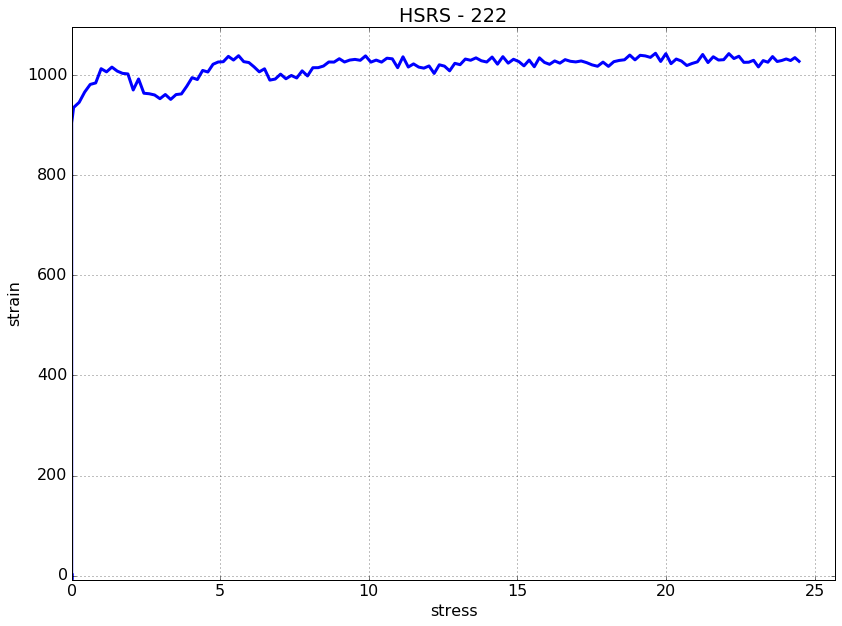

In [11]:
data = np.loadtxt('ref/HSRS/222')

test_suite.plot2D(data,'stress','strain','HSRS - 222')

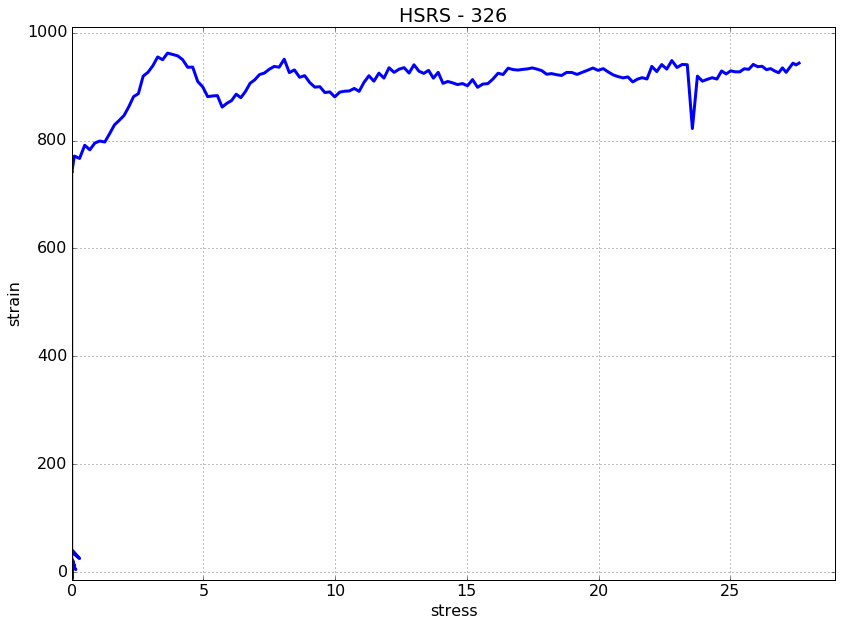

In [17]:
data = np.loadtxt('ref/HSRS/326')

test_suite.plot2D(data,'stress','strain','HSRS - 326')

## By running optimization methods, we have determined the optimal parameters to be (-93.1687,0.878) for /ref/HSRS/22

We must repeat this process for the other data sets and graph a comparison of the results. We can use ML to tailor this process as well, currently it is just minimizing

## Now we do this for ref/HSRS/222


In [34]:
import test_suite as suite
import irreversible_stressstrain as model
reload(test_suite)
reload(model)

model.mcfunc((-100.,1.),'ref/HSRS/22')

397.97064987549322

In [2]:
from irreversible_stressstrain import mcfunc
import test_suite as suite
suite.minimize_suite(mcfunc, ['L-BFGS-B'], [-100.,1] )

L-BFGS-B took 6.8727350235 seconds. The result, 397.946431254 was found at (-97.2268603274, 2.11310815695)
L-BFGS-B used 88.14453125 megabytes and took 4.0 iterations



## Now making this a class initializable with file to use

In [2]:
import test_suite
from irreversible_stressstrain import StressStrain
reload(test_suite)

model = StressStrain('ref/HSRS/22')
test_suite.minimize_suite(model.mcfunc,['L-BFGS-B'], [-100.,1])


NameError: global name '_error_evaluation_rms' is not defined

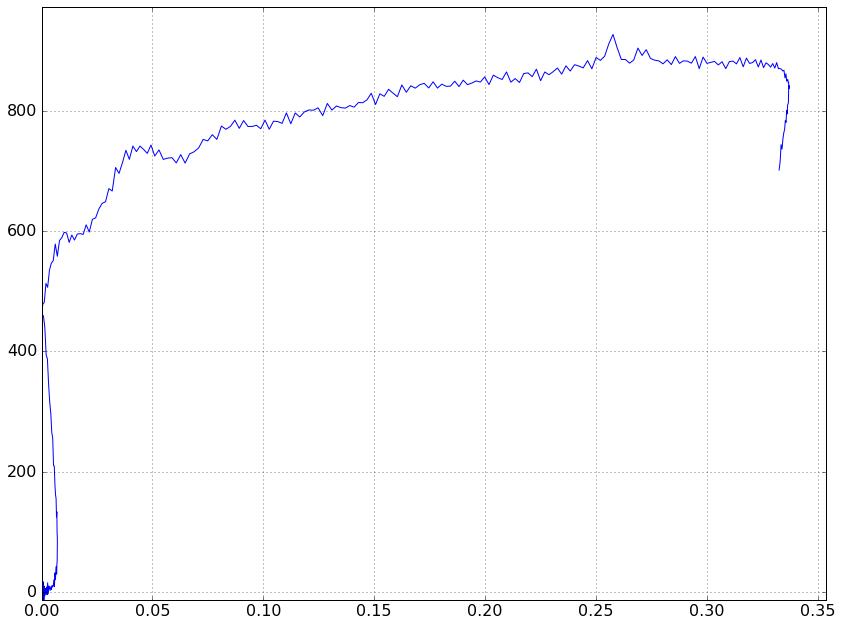

In [1]:
%matplotlib inline
import numpy as np
import graph_suite as plot
import test_suite

plot.plot2D(test_suite.xml_parse('kolskybar.xml'))